In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("fake_job_postings.csv", on_bad_lines='skip')

In [ ]:
#df.head()


In [ ]:
df.drop(['company_profile', 'description', 'requirements', 'benefits'], axis=1, inplace=True)
df

,job_id,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
from scipy.stats import skewnorm
import numpy as np

np.random.seed(42)  # Ensure reproducibility

def generate_skewed_data(size, mean, std, skew):
    """Generate skewed synthetic data."""
    shape = skew  # Skew parameter (positive = right skew, negative = left skew)
    scale = std
    loc = mean  # Center around the desired mean
    return skewnorm.rvs(shape, loc=loc, scale=scale, size=size)

# Define skew values for scam (right-skewed) and legit (left-skewed)
skew_values = {
    "has_links_without_https": (0, 0),
    "Identity_details_asked": (1, -2),
    "payment_asked": (0.5, -3),
    "average_days_between_interview_and_job_offer": (-1, 2),
    "no_of_interview_rounds": (2, -0.25)
}

# Initialize new columns
df['has_links_without_https'] = 0
df['Identity_details_asked'] = 0
df['payment_asked'] = 0
df['average_days_between_interview_and_job_offer'] = 0.0
df['no_of_interview_rounds'] = 0

# Generate and assign values for non-fraudulent (0.0)
df.loc[df['fraudulent'] == 0.0, 'has_links_without_https'] = generate_skewed_data(
    len(df[df['fraudulent'] == 0.0]), mean=0.4, std=0.3, skew=skew_values["has_links_without_https"][0]
).round().astype(int)

df.loc[df['fraudulent'] == 0.0, 'Identity_details_asked'] = generate_skewed_data(
    len(df[df['fraudulent'] == 0.0]), mean=0.2, std=0.3, skew=skew_values["Identity_details_asked"][0]
).round().astype(int)

df.loc[df['fraudulent'] == 0.0, 'payment_asked'] = generate_skewed_data(
    len(df[df['fraudulent'] == 0.0]), mean=0.05, std=0.3, skew=skew_values["payment_asked"][0]
).round().astype(int)

df.loc[df['fraudulent'] == 0.0, 'average_days_between_interview_and_job_offer'] = generate_skewed_data(
    len(df[df['fraudulent'] == 0.0]), mean=14, std=7, skew=skew_values["average_days_between_interview_and_job_offer"][0]
)

df.loc[df['fraudulent'] == 0.0, 'no_of_interview_rounds'] = generate_skewed_data(
    len(df[df['fraudulent'] == 0.0]), mean=3, std=2.8, skew=skew_values["no_of_interview_rounds"][0]
).astype(int)

# Generate and assign values for fraudulent (1.0)
df.loc[df['fraudulent'] == 1.0, 'has_links_without_https'] = generate_skewed_data(
    len(df[df['fraudulent'] == 1.0]), mean=0.2, std=0.2, skew=skew_values["has_links_without_https"][1]
).round().astype(int)

df.loc[df['fraudulent'] == 1.0, 'Identity_details_asked'] = generate_skewed_data(
    len(df[df['fraudulent'] == 1.0]), mean=0.7, std=0.4, skew=skew_values["Identity_details_asked"][1]
).round().astype(int)

df.loc[df['fraudulent'] == 1.0, 'payment_asked'] = generate_skewed_data(
    len(df[df['fraudulent'] == 1.0]), mean=0.8, std=0.4, skew=skew_values["payment_asked"][1]
).round().astype(int)

df.loc[df['fraudulent'] == 1.0, 'average_days_between_interview_and_job_offer'] = generate_skewed_data(
    len(df[df['fraudulent'] == 1.0]), mean=2, std=2, skew=skew_values["average_days_between_interview_and_job_offer"][1]
)

df.loc[df['fraudulent'] == 1.0, 'no_of_interview_rounds'] = generate_skewed_data(
    len(df[df['fraudulent'] == 1.0]), mean=1.3, std=1.1, skew=skew_values["no_of_interview_rounds"][1]
).astype(int)

# Ensure binary features stay in range [0,1]
df['has_links_without_https'] = df['has_links_without_https'].clip(0, 1)
df['Identity_details_asked'] = df['Identity_details_asked'].clip(0, 1)
df['payment_asked'] = df['payment_asked'].clip(0, 1)

# Ensure interview rounds are at least 0
df['no_of_interview_rounds'] = df['no_of_interview_rounds'].clip(0)

# Display summary statistics
#print(df[['fraudulent', 'has_links_without_https', 'Identity_details_asked', 'payment_asked', 'average_days_between_interview_and_job_offer', 'no_of_interview_rounds']].describe())
#df.head()


In [ ]:
# Define skew values for time-sensitive and biased phrases
skew_values.update({
    "avg_no_of_time_sensitive_details": (0.12, 0.1),  # Right skew for legit, Left skew for scam
    "avg_no_of_baity_phrases": (-1, 0.5)  # Right skew for scam, Left skew for legit
})

# Initialize new columns for avg_no_of_time_sensitive_details and avg_no_of_baity_phrases
df['avg_no_of_time_sensitive_details'] = 0.0
df['avg_no_of_baity_phrases'] = 0.0

# Generate and assign values for non-fraudulent (0.0)
df.loc[df['fraudulent'] == 0.0, 'avg_no_of_time_sensitive_details'] = generate_skewed_data(
    len(df[df['fraudulent'] == 0.0]), mean=3.2, std=2, skew=skew_values["avg_no_of_time_sensitive_details"][0]
)

df.loc[df['fraudulent'] == 0.0, 'avg_no_of_baity_phrases'] = generate_skewed_data(
    len(df[df['fraudulent'] == 0.0]), mean=1.8, std=2, skew=skew_values["avg_no_of_baity_phrases"][0]
)

# Generate and assign values for fraudulent (1.0)
df.loc[df['fraudulent'] == 1.0, 'avg_no_of_time_sensitive_details'] = generate_skewed_data(
    len(df[df['fraudulent'] == 1.0]), mean=3, std=2, skew=skew_values["avg_no_of_time_sensitive_details"][1]
)

df.loc[df['fraudulent'] == 1.0, 'avg_no_of_baity_phrases'] = generate_skewed_data(
    len(df[df['fraudulent'] == 1.0]), mean=2.2, std=2, skew=skew_values["avg_no_of_baity_phrases"][1]
)

# Ensure values are non-negative (or clip as needed)
df['avg_no_of_time_sensitive_details'] = df['avg_no_of_time_sensitive_details'].clip(0)
df['avg_no_of_baity_phrases'] = df['avg_no_of_baity_phrases'].clip(0)

# Display summary statistics for the new columns
#print(df[['fraudulent', 'avg_no_of_time_sensitive_details', 'avg_no_of_baity_phrases']].describe())


In [ ]:
import numpy as np

# Set noise percentage (1-2%)
noise_percentage = 0.02  # 2% noise

# Introduce noise into the target variable (fraudulent)
num_samples = len(df)
noise_indices = np.random.choice(df.index, size=int(num_samples * noise_percentage), replace=False)

# Flip 'fraudulent' labels (0 -> 1 or 1 -> 0) for these randomly selected indices
df.loc[noise_indices, 'fraudulent'] = 1 - df.loc[noise_indices, 'fraudulent']

# Introduce noise in features by randomly adding small variations or setting some values to NaN
feature_columns = ['has_links_without_https', 'Identity_details_asked', 'payment_asked', 'average_days_between_interview_and_job_offer', 'no_of_interview_rounds', 'avg_no_of_baity_phrases', 'avg_no_of_time_sensitive_details']

# Add small random noise to features
for column in feature_columns:
    noise = np.random.normal(0, 0.3, size=num_samples)  # Normal noise with mean 0 and small std dev
    df[column] += noise  # Add noise to the feature

    # Randomly set some feature values to NaN (0.5% of the data)
    nan_indices = np.random.choice(df.index, size=int(num_samples * 0.005), replace=False)
    df.loc[nan_indices, column] = np.nan

# Re-clip the values to ensure they stay within valid ranges
df['has_links_without_https'] = df['has_links_without_https'].clip(0, 1)
df['Identity_details_asked'] = df['Identity_details_asked'].clip(0, 1)
df['payment_asked'] = df['payment_asked'].clip(0, 1)
df['no_of_interview_rounds'] = df['no_of_interview_rounds'].clip(0)

# Ensure that noise does not produce invalid values for 'average_days_between_interview_and_job_offer'
df['average_days_between_interview_and_job_offer'] = df['average_days_between_interview_and_job_offer'].clip(0)

# Display summary statistics to check the effect of noise
#print(df[['fraudulent', 'has_links_without_https', 'Identity_details_asked', 'payment_asked', 'average_days_between_interview_and_job_offer', 'no_of_interview_rounds']].describe())


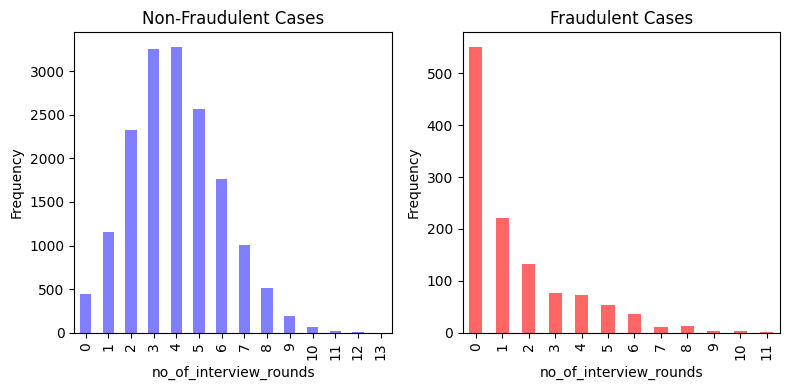

In [ ]:
compare_plot_fraudulent_and_nonfraudulent_class(df, 'no_of_interview_rounds')


In [ ]:
def compare_plot_fraudulent_and_nonfraudulent_class(df, feature, tag="original", nrows=1, ncols=2):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    # Filter the DataFrame for fraudulent (1.0) and non-fraudulent (0.0) cases
    filtered_df_f = df.loc[df['fraudulent'] == 0.0]
    filtered_df_t = df.loc[df['fraudulent'] == 1.0]

    # Convert feature values to integers, then get sorted value counts
    value_counts_f = (
        filtered_df_f[feature]
        .dropna()
        .astype(int)
        .value_counts()
        .sort_index()  # Ensure ascending order
    )

    value_counts_t = (
        filtered_df_t[feature]
        .dropna()
        .astype(int)
        .value_counts()
        .sort_index()  # Ensure ascending order
    )

    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 4))

    # Plot sorted data
    value_counts_f.plot(kind='bar', ax=axes[0], color='b', alpha=0.5)
    axes[0].set_title('Non-Fraudulent Cases')
    axes[0].set_ylabel('Frequency')
    axes[0].set_xlabel(feature)

    value_counts_t.plot(kind='bar', ax=axes[1], color='r', alpha=0.6)
    axes[1].set_title('Fraudulent Cases')
    axes[1].set_ylabel('Frequency')
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()


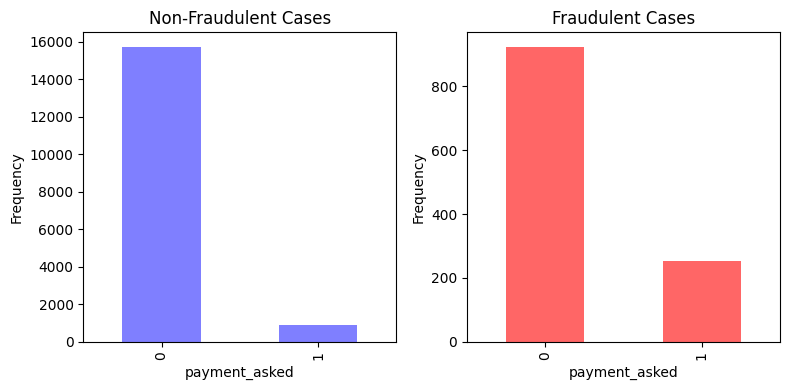

In [ ]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'payment_asked')


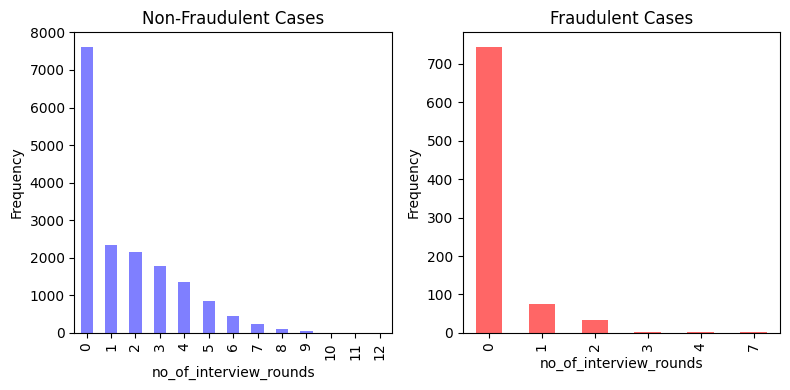

In [ ]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'no_of_interview_rounds')


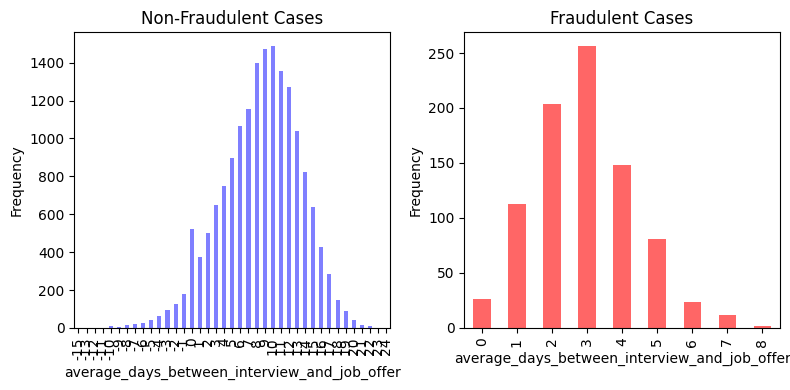

In [ ]:
compare_plot_fraudulent_and_nonfraudulent_class(df, 'average_days_between_interview_and_job_offer')



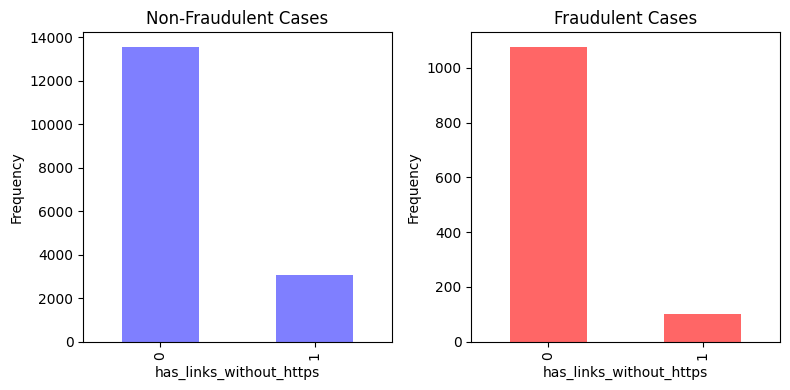

In [ ]:
compare_plot_fraudulent_and_nonfraudulent_class(df,'has_links_without_https')


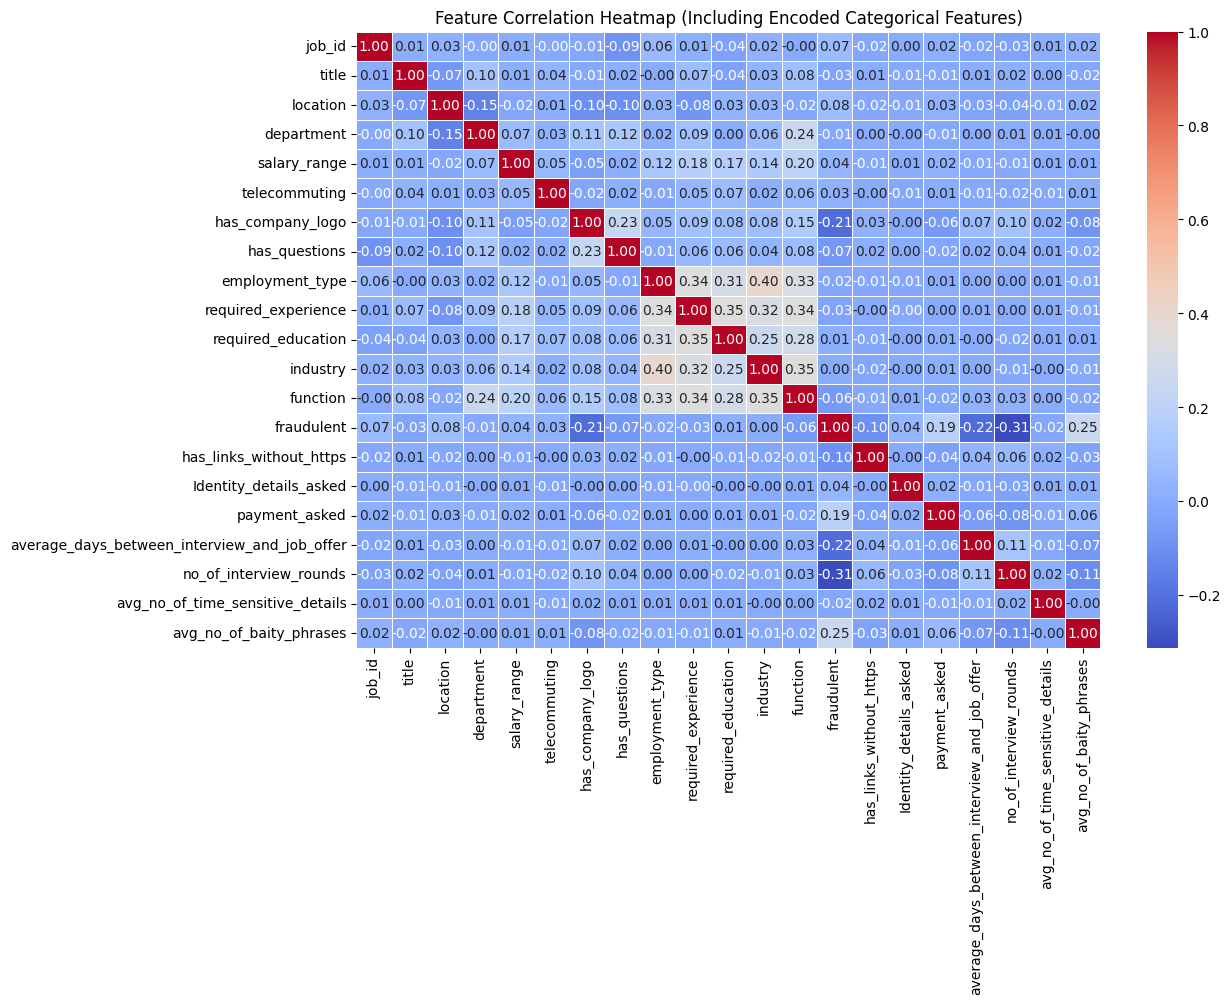

In [ ]:
df_encoded = df.copy()

# Convert categorical features using label encoding
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute correlation on transformed data
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Including Encoded Categorical Features)")
plt.show()


In [ ]:
df.rename(columns={'fraudulent': 'is_scam'}, inplace=True)
df.to_csv('kaggle_plus_seven.csv', index=False)


#FULLY SYNTHESIZED DATASET

In [ ]:
df = pd.read_csv("synthesized_job_data.csv")
df.rename(columns={'is_scam': 'fraudulent'}, inplace=True)
df.columns

Index(['job_id', 'job_title', 'email_content', 'sender_domain',
       'legitimate_company', 'fraudulent', 'contact_info',
       'presence_of_urgency_words', 'phishing_words', 'presence_emojis',
       'benefits', 'Identity_details_asked', 'Application_process',
       'average_days_to_between_interview_and_job_offer',
       'avg_response_time(in minuites)', 'no_of_interview_round',
       'employment_type', 'department', 'location', 'job_requirements',
       'salary_range'],
      dtype='object')

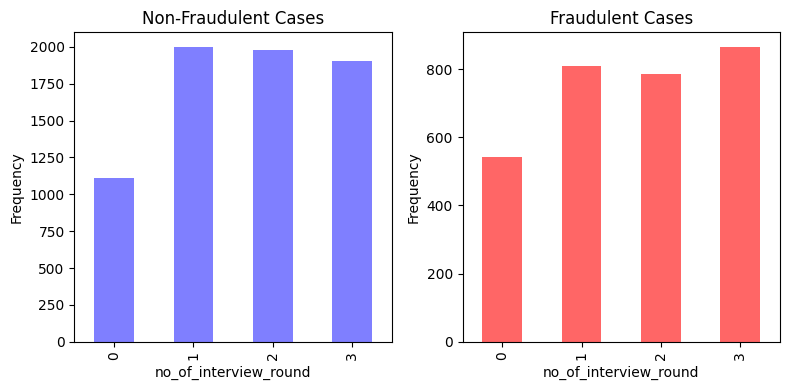

In [ ]:
compare_plot_fraudulent_and_nonfraudulent_class(df, 'no_of_interview_round')

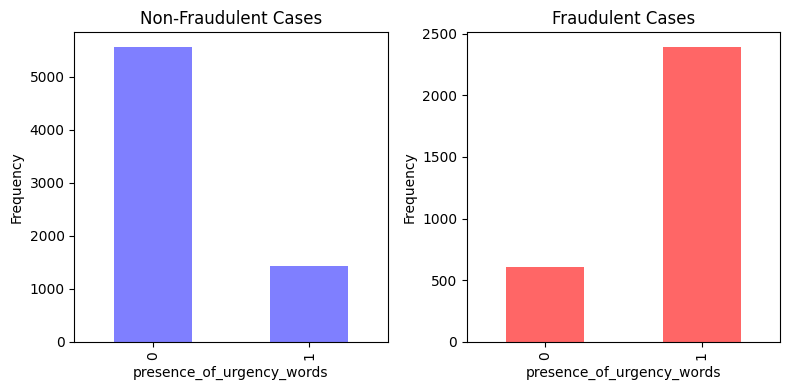

In [ ]:
compare_plot_fraudulent_and_nonfraudulent_class(df, 'presence_of_urgency_words')

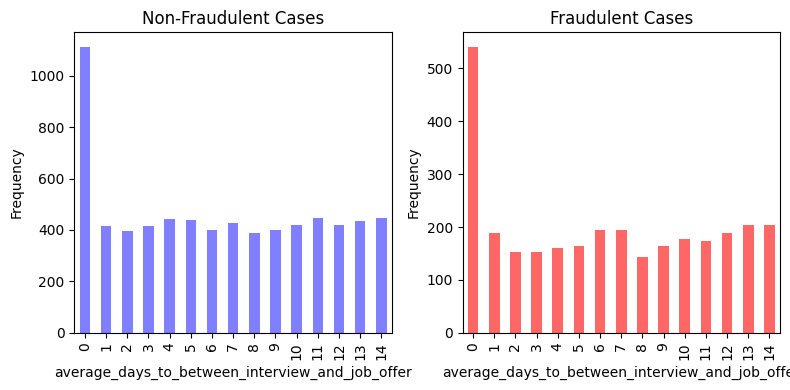

In [ ]:
compare_plot_fraudulent_and_nonfraudulent_class(df, 'average_days_between_interview_and_job_offer')

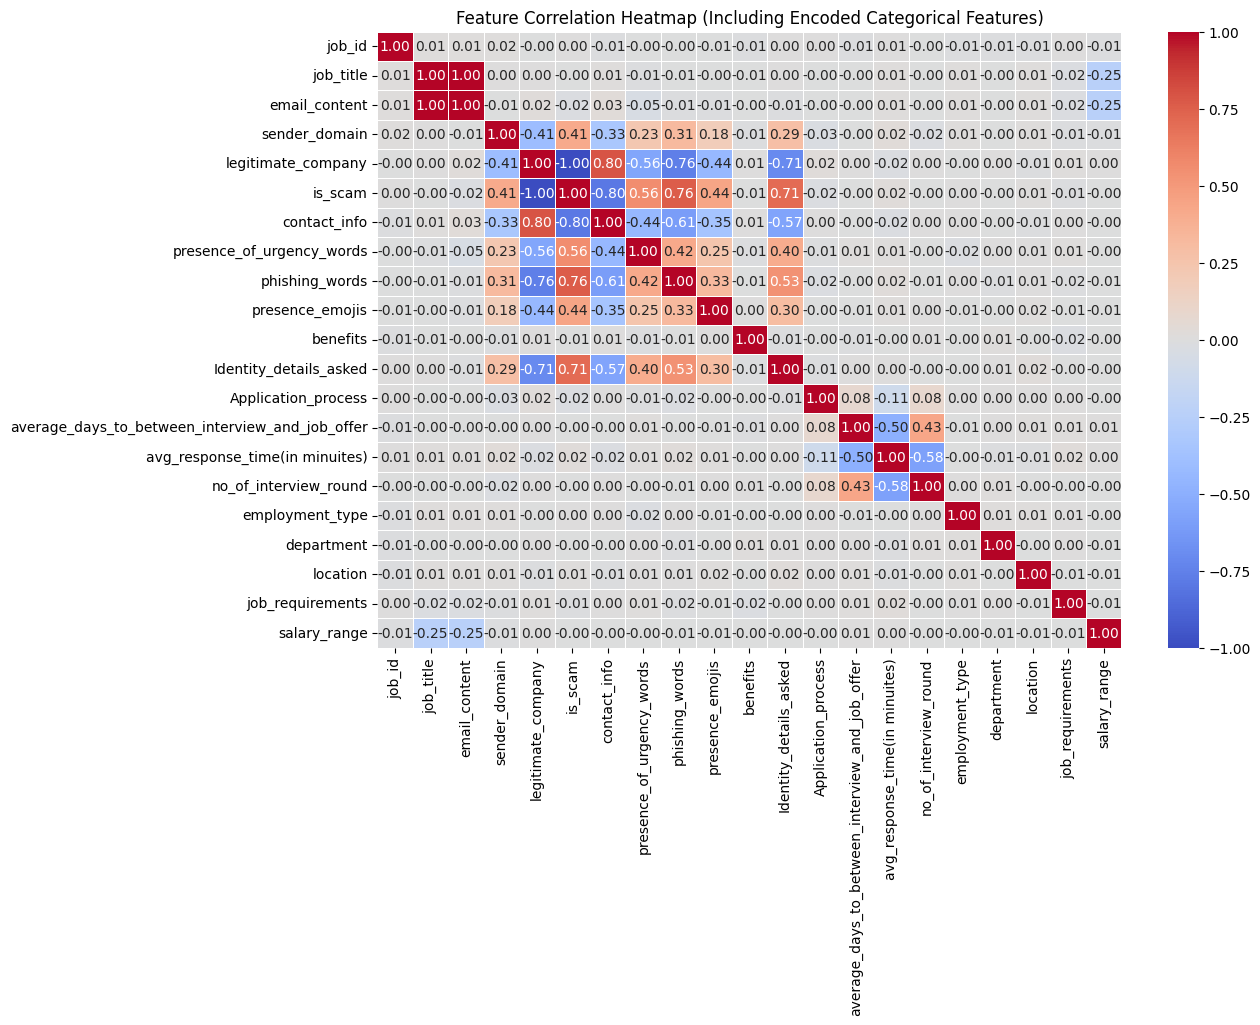

In [ ]:
df_encoded = df.copy()

# Convert categorical features using label encoding
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute correlation on transformed data
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Including Encoded Categorical Features)")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("kaggle_plus_seven.csv")
print(df['is_scam'].value_counts())

# Inspect the dataset
#print("Columns in the dataset:", df.columns)
#print(df.head())

# Strip spaces from column names if needed
df.columns = df.columns.str.strip()

# Check and encode the 'title' column
df['job_title_encoded'] = LabelEncoder().fit_transform(df['title'])

# Identify target and features
y = df['is_scam']
X = df.drop(columns=['is_scam', 'title'])  # Drop 'title' as it's already encoded

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Encode categorical columns (if any)
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Handle missing values using SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = imputer.fit_transform(X[numeric_cols])  # Impute missing values in numeric columns

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_numeric_imputed, y, test_size=0.2, random_state=42)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# SVM (Support Vector Machine) Model
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate models
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


is_scam
0    16695
1     1185
Name: count, dtype: int64

Logistic Regression Accuracy: 0.9653243847874721
Logistic Regression Confusion Matrix:
[[3327    8]
 [ 116  125]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3335
           1       0.94      0.52      0.67       241

    accuracy                           0.97      3576
   macro avg       0.95      0.76      0.83      3576
weighted avg       0.96      0.97      0.96      3576


SVM Accuracy: 0.9692393736017897
SVM Confusion Matrix:
[[3327    8]
 [ 102  139]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3335
           1       0.95      0.58      0.72       241

    accuracy                           0.97      3576
   macro avg       0.96      0.79      0.85      3576
weighted avg       0.97      0.97      0.97      3576

